In [33]:
library(dplyr)
library(ggplot2)
library(readr)
library(magrittr)

In [34]:
d_upper <- read_delim('dfe_outfile_upper_connectivity.csv', delim = ' ', col_names = FALSE);
d_lower <- read_delim('dfe_outfile_lower_connectivity.csv', delim = ' ', col_names = FALSE);
dim(d_upper); dim(d_lower);

head(d_upper); head(d_lower)

Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_double(),
  X5 = col_double(),
  X6 = col_double(),
  X7 = col_double(),
  X8 = col_double(),
  X9 = col_double(),
  X10 = col_double(),
  X11 = col_double(),
  X12 = col_double(),
  X13 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_double(),
  X5 = col_double(),
  X6 = col_double(),
  X7 = col_double(),
  X8 = col_double(),
  X9 = col_double(),
  X10 = col_double(),
  X11 = col_double(),
  X12 = col_double(),
  X13 = col_character()
)


[1] 101  13

[1] 101  13

X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13
0,1,0.228760,1,10,0.050160,10,100,0.061159,100,-99,0.659921,NA
0,1,0.222626,1,10,0.092410,10,100,0.130629,100,-99,0.554335,NA
0,1,0.245835,1,10,0.075784,10,100,0.099133,100,-99,0.579248,NA
0,1,0.262262,1,10,0.059204,10,100,0.072569,100,-99,0.605966,NA
0,1,0.241143,1,10,0.057309,10,100,0.070929,100,-99,0.630620,NA
0,1,0.214085,1,10,0.065289,10,100,0.085197,100,-99,0.635430,NA


X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13
0,1,0.271980,1,10,0.044931,10,100,0.052353,100,-99,0.630736,NA
0,1,0.268211,1,10,0.032727,10,100,0.036720,100,-99,0.662342,NA
0,1,0.250568,1,10,0.039183,10,100,0.045311,100,-99,0.664937,NA
0,1,0.268523,1,10,0.082616,10,100,0.108004,100,-99,0.540857,NA
0,1,0.238679,1,10,0.039237,10,100,0.045688,100,-99,0.676395,NA
0,1,0.254042,1,10,0.066294,10,100,0.083591,100,-99,0.596074,NA


In [35]:
library(purrr)
library(tidyr)

In [36]:
dfe <- lapply(ls(pattern = 'd*r'), get)
names(dfe) <- ls(pattern = 'd*r')

In [37]:
lapply(dfe, function(df) head(df))

X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13
0,1,0.271980,1,10,0.044931,10,100,0.052353,100,-99,0.630736,NA
0,1,0.268211,1,10,0.032727,10,100,0.036720,100,-99,0.662342,NA
0,1,0.250568,1,10,0.039183,10,100,0.045311,100,-99,0.664937,NA
0,1,0.268523,1,10,0.082616,10,100,0.108004,100,-99,0.540857,NA
0,1,0.238679,1,10,0.039237,10,100,0.045688,100,-99,0.676395,NA
0,1,0.254042,1,10,0.066294,10,100,0.083591,100,-99,0.596074,NA
X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13
0,1,0.228760,1,10,0.050160,10,100,0.061159,100,-99,0.659921,NA
0,1,0.222626,1,10,0.092410,10,100,0.130629,100,-99,0.554335,NA
0,1,0.245835,1,10,0.075784,10,100,0.099133,100,-99,0.579248,NA


In [38]:
dfe %<>% 
    lapply(function(df) select(df, group_1 = X3, group_2 = X6, group_3 = X9, group_4 = X12))
        
lapply(dfe, function(df) head(df))       

group_1,group_2,group_3,group_4
0.271980,0.044931,0.052353,0.630736
0.268211,0.032727,0.036720,0.662342
0.250568,0.039183,0.045311,0.664937
0.268523,0.082616,0.108004,0.540857
0.238679,0.039237,0.045688,0.676395
0.254042,0.066294,0.083591,0.596074
group_1,group_2,group_3,group_4
0.228760,0.050160,0.061159,0.659921
0.222626,0.092410,0.130629,0.554335
0.245835,0.075784,0.099133,0.579248


In [39]:
dfe_full <- reduce(dfe, bind_cols)

head(dfe_full)

group_1,group_2,group_3,group_4,group_11,group_21,group_31,group_41
0.271980,0.044931,0.052353,0.630736,0.228760,0.050160,0.061159,0.659921
0.268211,0.032727,0.036720,0.662342,0.222626,0.092410,0.130629,0.554335
0.250568,0.039183,0.045311,0.664937,0.245835,0.075784,0.099133,0.579248
0.268523,0.082616,0.108004,0.540857,0.262262,0.059204,0.072569,0.605966
0.238679,0.039237,0.045688,0.676395,0.241143,0.057309,0.070929,0.630620
0.254042,0.066294,0.083591,0.596074,0.214085,0.065289,0.085197,0.635430


In [40]:
dfe_full %<>% rename('0-1 lower' = group_1, '1-10 lower' = group_2, '10-100 lower' = group_3, '100-infinity lower' = group_4,
                    '0-1 upper' = group_11, '1-10 upper' = group_21, '10-100 upper' = group_31, '100-infinity upper' = group_41)

head(dfe_full)

0-1 lower,1-10 lower,10-100 lower,100-infinity lower,0-1 upper,1-10 upper,10-100 upper,100-infinity upper
0.271980,0.044931,0.052353,0.630736,0.228760,0.050160,0.061159,0.659921
0.268211,0.032727,0.036720,0.662342,0.222626,0.092410,0.130629,0.554335
0.250568,0.039183,0.045311,0.664937,0.245835,0.075784,0.099133,0.579248
0.268523,0.082616,0.108004,0.540857,0.262262,0.059204,0.072569,0.605966
0.238679,0.039237,0.045688,0.676395,0.241143,0.057309,0.070929,0.630620
0.254042,0.066294,0.083591,0.596074,0.214085,0.065289,0.085197,0.635430


In [41]:
dfe_full %<>%
    gather(group, value)

head(dfe_full)

group,value
0-1 lower,0.271980
0-1 lower,0.268211
0-1 lower,0.250568
0-1 lower,0.268523
0-1 lower,0.238679
0-1 lower,0.254042


In [42]:
dfe_full_cis <- dfe_full %>%
    group_by(group) %>%
    summarise(group_mean = mean(value), group_sd = sd(value), group_n = n()) %>%
    mutate(error = qt(0.975, df = (group_n - 1)) * ((group_sd) / sqrt(group_n))) %>%
    mutate(error_left = group_mean - error, error_right = group_mean + error) %>%
    separate(group, c('range', 'type_of'), sep = ' ') %>%
    mutate(type_of = case_when(type_of == 'lower' ~ 'bottom 10%', type_of == 'upper' ~ 'top 10%'))

dfe_full_cis

range,type_of,group_mean,group_sd,group_n,error,error_left,error_right
0-1,bottom 10%,0.23916141,0.02596494,101,0.005125805,0.23403560,0.24428721
0-1,top 10%,0.24119093,0.01962876,101,0.003874964,0.23731597,0.24506589
1-10,bottom 10%,0.05004147,0.01607480,101,0.003173367,0.04686810,0.05321483
1-10,top 10%,0.06387839,0.01842867,101,0.003638051,0.06024034,0.06751644
10-100,bottom 10%,0.06190425,0.02388715,101,0.004715623,0.05718862,0.06661987
10-100,top 10%,0.08245371,0.02882691,101,0.005690793,0.07676292,0.08814451
100-infinity,bottom 10%,0.64889298,0.04170511,101,0.008233112,0.64065987,0.65712609
100-infinity,top 10%,0.61247706,0.04578275,101,0.009038090,0.60343897,0.62151515


In [43]:
dfe_full_cis$range[1]

[1] "0-1"

In [44]:
my.plot<-ggplot(dfe_full_cis, aes(x = factor(range), y = group_mean, fill = factor(type_of))) + 
geom_bar(stat = 'identity', position = 'dodge') +
geom_errorbar(aes(ymin = error_left, ymax = error_right), position = position_dodge(0.9), width = 0.3, size = 0.8) +
theme_linedraw() +
# scale_fill_brewer(palette = 9, direction = 1) +
scale_fill_manual(values=c("#a6a6a6","#000399")) +
xlab(expression(paste(N[e], 's'))) +
ylab('proportion of mutations') +
theme(panel.grid.major = element_blank(), panel.grid.minor = element_line(),
      axis.text = element_text(size = 14),
      axis.title = element_text(size = 14)) +
theme(legend.position = c(0.85, 0.92)) +
guides(fill = guide_legend(title = expression(paste("Measure: degree")))) +
coord_cartesian(y = c(0, 1))
ggsave(plot=my.plot, "./degree_props.png")

Saving 6.67 x 6.67 in image


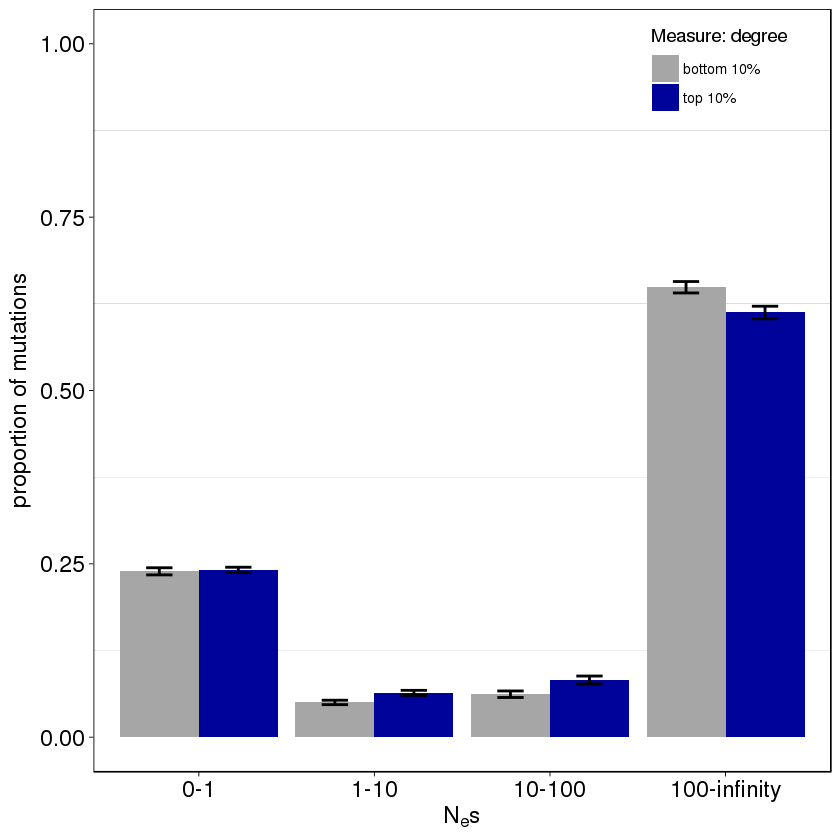

In [45]:
my.plot

from https://www.cyclismo.org/tutorial/R/confidence.html

> mean <- 5
> sd <- 2
> sample size <- 20
> error <- qt(0.975,df=n-1)*s/sqrt(n)
> left <- a-error
> right <- a+error
> left
[1] 4.063971
> right
[1] 5.936029